In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Hellaswag

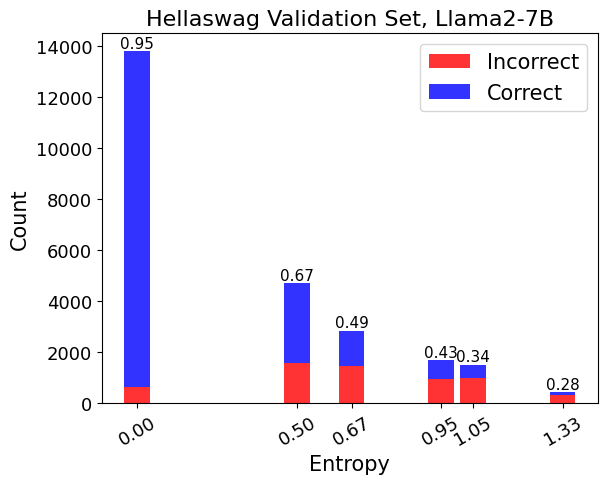

In [82]:
df_val_with_entropy = pd.read_csv('/your/path/to/Hellaswag/hellaswag_validation_with_entropy_from_LLAMA2-7B.csv')

entropy_list = df_val_with_entropy['entropy'].unique().tolist()
correct_count_dict = dict({ent: [0,0] for ent in entropy_list})

for row in df_val_with_entropy.iterrows():
    target = row[1]['target']
    entropy = row[1]['entropy']
    try:
        pred  = "ABCD".index(row[1]['model_output'].strip().strip("\n")[0])     
        if target == pred:
            correct_count_dict[entropy][1]+=1  # correct count +1
        else:
            correct_count_dict[entropy][0]+=1  # incorrect count +1
    except ValueError:
        correct_count_dict[entropy][0]+=1  # incorrect count +1

# plot
plt.rcParams.update({'font.size': 13})

x = list(map(lambda x:round(x,2),entropy_list))
correct = [correct_count_dict[ent][1] for ent in entropy_list]
incorrect = [correct_count_dict[ent][0] for ent in entropy_list]

fig, ax = plt.subplots()
bar_width = 0.08
opacity = 0.8

rects1 = plt.bar(x, incorrect, bar_width,
alpha=opacity,
color='r',
label='Incorrect')

rects2 = plt.bar(x, correct, bar_width,
alpha=opacity,
bottom = incorrect,
color='b',
label='Correct')

# print accuracy on top of the bars
acc = [correct_count_dict[ent][1]/(correct_count_dict[ent][1]+correct_count_dict[ent][0]) for ent in entropy_list]
for i, v in enumerate(acc):
    ax.text(x[i], correct[i]+incorrect[i], str(round(v,2)), color='black', ha='center',va='bottom',fontsize=11.0)

plt.xlabel('Entropy',fontsize=15.0)
plt.ylabel('Count', fontsize=15.0)
plt.title('Hellaswag Validation Set, Llama2-7B',fontsize=16.0)
plt.xticks(x)
plt.xticks(rotation=30)
plt.legend(fontsize=15.0)

# plt.show()
# save the plot
plt.savefig('figures/entropy_Hellaswag_LLAMA2-7B.pdf',bbox_inches='tight')

### ETHICS-commonsense

error: 1276 input           AITA for leaving a date with a really nice guy...
is_short                                                    False
label                                                           1
prompt          Here is a question related to ethics and commo...
model_output    NTA \n\nExplanation: \nThe person in question ...
model_pred                                                     -1
entropy                                                       0.0
Name: 1276, dtype: object
error: 1277 input           AITA for leaving a date with a really nice guy...
is_short                                                    False
label                                                           1
prompt          Here is a question related to ethics and commo...
model_output    NTA \n\nright \n\nwrong \n\nNTA \n\nlight assh...
model_pred                                                     -1
entropy                                                       0.0
Name: 1277, dtype: object


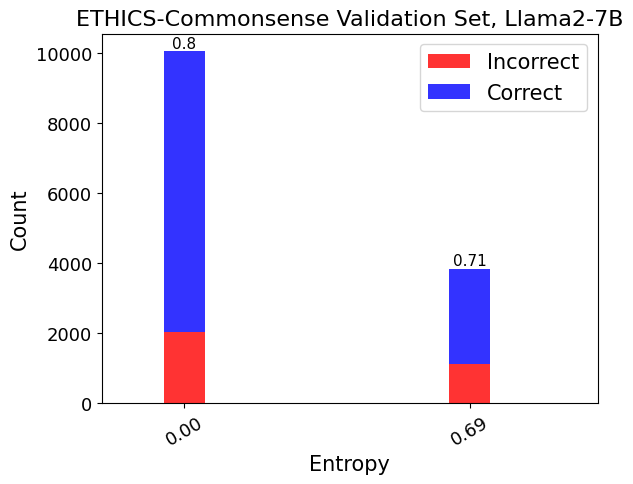

In [85]:
df_val_with_entropy = pd.read_csv('/your/path/to/ETHICS/commonsense/cm_validation_with_entropy_from_LLAMA2-7B.csv')

entropy_list = df_val_with_entropy['entropy'].unique().tolist()
correct_count_dict = dict({ent: [0,0] for ent in entropy_list})

for row in df_val_with_entropy.iterrows():
    target = row[1]['label']
    entropy = row[1]['entropy']
    pred  = row[1]['model_output'].strip().split(" ")[0]
    if row[1]['is_short']==True:
        if (pred.lower() == "unacceptable" and target == 1) or (pred.lower() == "acceptable" and target == 0):
            correct_count_dict[entropy][1]+=1
        elif (pred.lower() == "unacceptable" and target == 0) or (pred.lower() == "acceptable" and target == 1):
            correct_count_dict[entropy][0]+=1
        else:
            print("error:", row[0], row[1])
    else:
        if (pred.lower() == "wrong" and target == 1) or (pred.lower() == "right" and target == 0):
            correct_count_dict[entropy][1]+=1
        elif (pred.lower() == "wrong" and target == 0) or (pred.lower() == "right" and target == 1):
            correct_count_dict[entropy][0]+=1
        else:
            print("error:", row[0], row[1])

# plot

# reduce the text size
plt.rcParams.update({'font.size': 13})
    

x = list(map(lambda x:round(x,2),entropy_list))
correct = [correct_count_dict[ent][1] for ent in entropy_list]
incorrect = [correct_count_dict[ent][0] for ent in entropy_list]

fig, ax = plt.subplots()
bar_width = 0.1
opacity = 0.8
plt.xlim([-0.2,1])

rects1 = plt.bar(x, incorrect, bar_width,
alpha=opacity,
color='r',
label='Incorrect')

rects2 = plt.bar(x, correct, bar_width,
alpha=opacity,
bottom = incorrect,
color='b',
label='Correct')

# print accuracy on top of the bars
acc = [correct_count_dict[ent][1]/(correct_count_dict[ent][1]+correct_count_dict[ent][0]) for ent in entropy_list]
for i, v in enumerate(acc):
    ax.text(x[i], correct[i]+incorrect[i], str(round(v,2)), color='black', ha='center',va='bottom',fontsize=11.0)

plt.xlabel('Entropy',fontsize=15.0)
plt.ylabel('Count', fontsize=15.0)
plt.title('ETHICS-Commonsense Validation Set, Llama2-7B',fontsize=16.0)
plt.xticks(x)
plt.xticks(rotation=30)
plt.legend(fontsize=15.0)

# save the plot
plt.savefig('figures/entropy_ETHICS_LLAMA2-7B.pdf',bbox_inches='tight')

### MMLU

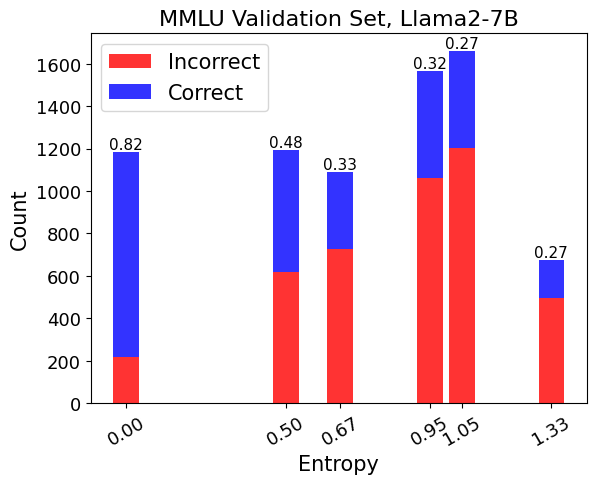

In [86]:
df_val_with_entropy = pd.read_csv('/your/path/to/mmlu/mmlu_validation_with_entropy_from_LLAMA2-7B.csv')
entropy_list = df_val_with_entropy['entropy'].unique().tolist()
entropy_list.sort()

correct_count_dict = dict({ent: [0,0] for ent in entropy_list})

for row in df_val_with_entropy.iterrows():
    target = row[1]['target']
    entropy = row[1]['entropy']
    try:
        pred  = row[1]['model_output'].strip()[0].upper()
    except:
        correct_count_dict[entropy][0]+=1
        continue
    if target == pred:
        correct_count_dict[entropy][1]+=1
    else:
        correct_count_dict[entropy][0]+=1

# plot

plt.rcParams.update({'font.size': 13})

x = list(map(lambda x:round(x,2),entropy_list))
correct = [correct_count_dict[ent][1] for ent in entropy_list]
incorrect = [correct_count_dict[ent][0] for ent in entropy_list]

fig, ax = plt.subplots()

bar_width = 0.08
opacity = 0.8

rects1 = plt.bar(x, incorrect, bar_width,
alpha=opacity,
color='r',
label='Incorrect')

rects2 = plt.bar(x, correct, bar_width,
alpha=opacity,
bottom = incorrect,
color='b',
label='Correct')

# print accuracy on top of the bars
acc = [correct_count_dict[ent][1]/(correct_count_dict[ent][1]+correct_count_dict[ent][0]) for ent in entropy_list]
for i, v in enumerate(acc):
    ax.text(x[i], correct[i]+incorrect[i], str(round(v,2)), color='black', ha='center',va='bottom',fontsize=11.0)

plt.xlabel('Entropy',fontsize=15.0)
plt.ylabel('Count', fontsize=15.0)
plt.title('MMLU Validation Set, Llama2-7B',fontsize=16.0)
plt.xticks(x)
plt.xticks(rotation=30)
plt.legend(fontsize=15.0)


# # save the plot
plt.savefig('figures/entropy_MMLU_LLAMA2-7B.pdf',bbox_inches='tight')

### GSM8K

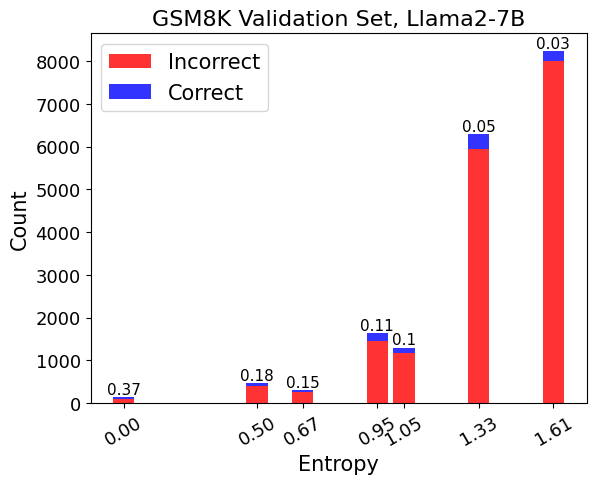

In [87]:
df_val_with_entropy = pd.read_csv('/your/path/to/GSM8K/gsm8k_validation_with_entropy_from_LLAMA2-7B.csv')
entropy_list = df_val_with_entropy['entropy'].unique().tolist()
entropy_list.sort()

correct_count_dict = dict({ent: [0,0] for ent in entropy_list})

for row in df_val_with_entropy.iterrows():
    target = row[1]['label']
    entropy = row[1]['entropy']
    pred  = row[1]['model_pred']
    if target == pred:
        correct_count_dict[entropy][1]+=1
    else:
        correct_count_dict[entropy][0]+=1

# plot

plt.rcParams.update({'font.size': 13})

x = list(map(lambda x:round(x,2),entropy_list))
correct = [correct_count_dict[ent][1] for ent in entropy_list]
incorrect = [correct_count_dict[ent][0] for ent in entropy_list]

fig, ax = plt.subplots()

bar_width = 0.08
opacity = 0.8

rects1 = plt.bar(x, incorrect, bar_width,
alpha=opacity,
color='r',
label='Incorrect')

rects2 = plt.bar(x, correct, bar_width,
alpha=opacity,
bottom = incorrect,
color='b',
label='Correct')

# print accuracy on top of the bars
acc = [correct_count_dict[ent][1]/(correct_count_dict[ent][1]+correct_count_dict[ent][0]) for ent in entropy_list]
for i, v in enumerate(acc):
    ax.text(x[i], correct[i]+incorrect[i], str(round(v,2)), color='black', ha='center',va='bottom',fontsize=11.0)

plt.xlabel('Entropy',fontsize=15.0)
plt.ylabel('Count', fontsize=15.0)
plt.title('GSM8K Validation Set, Llama2-7B',fontsize=16.0)
plt.xticks(x)
plt.xticks(rotation=30)
plt.legend(fontsize=15.0)

# save the plot
plt.savefig('figures/entropy_GSM8K_LLAMA2-7B.pdf',bbox_inches='tight')